# **Basic important libraries**

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import clone
from sklearn.metrics import r2_score

# **Drive Mount**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Machine Learning/Assignment 2

Mounted at /content/drive
/content/drive/MyDrive/Machine Learning/Assignment 2


# **Data**

In [4]:
df = pd.read_csv("BitcoinHeistData.csv")

In [5]:
le = preprocessing.LabelEncoder()
le.fit(df.label)
df['label'] = le.transform(df.label)

In [6]:
check_nan = df.isnull().values.any()
# printing the result
print(check_nan)

False


In [7]:
print("labels : " , df.label.unique())
print("number of unique labels :" , df.label.nunique(dropna = True))

labels :  [26 27  4  3 23 19  7  5 17  9 14  6 10  8 25 18 22 24 12 13 21 20 15  2
 11 16  1  0 28]
number of unique labels : 29


,year,day,length,weight,count,looped,neighbors,income,label
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09,2.786413e+01
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11,1.619233e+00
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07,0.000000e+00
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07,2.800000e+01
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08,2.800000e+01
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08,2.800000e+01
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13,2.800000e+01


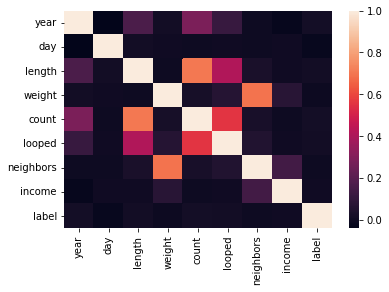

In [8]:
ax = sns.heatmap(df.corr())
df.describe()

# **Data split**

In [19]:
# IID - SHUFFLING DATA 
np.random.seed(0)
data = df.sample(frac=1)
Y = df['label']
X = df.drop(['label' ,'address'],axis = 1)
print(X.shape , Y.shape)

(2916697, 8) (2916697,)


In [20]:
# Custom test_trian_evalustion split function
def train_test_val_split(x , y , train, test , validation):
  random1 = np.random.rand(x.shape[0])
  split1 = random1 < np.percentile(random1,train*100)
  # choosing random train%  data and putting them in x train and putting the not chosen 100 - train % into test&val array
  x_train = x[split1]
  y_train = y[split1]
  x_test_val = x[~split1]
  y_test_val = y[~split1]
  # dividing test&val array into test set and val set using same process as above.
  random2 = np.random.rand(x_test_val.shape[0])
  validation = validation/(validation + test)
  split2 = random2 < np.percentile(random2,(1-validation)*100)
  x_test = x_test_val[split2]
  y_test = y_test_val[split2]
  x_val = x_test_val[~split2]
  y_val = y_test_val[~split2]
  # return the test ,train and val arrays.
  return x_train,x_test,x_val,y_train,y_test,y_val

In [23]:
x_train,x_test,x_val,y_train,y_test,y_val = train_test_val_split(X,Y,0.70 ,0.15,0.15)
# cheching the shapes to make sure of the split ration
x_train.shape, x_test.shape, x_val.shape, y_train.shape, y_test.shape, y_val.shape

((2041688, 8), (437504, 8), (437505, 8), (2041688,), (437504,), (437505,))

# **Part A**

In [ ]:
def accuracy(y_predicted, y_test):
    return np.sum(y_test == y_predicted)/len(y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gini_model = DecisionTreeClassifier(criterion="gini")
entropy_model = DecisionTreeClassifier(criterion="entropy")

gini_model.fit(x_train,y_train)
entropy_model.fit(x_train,y_train)

print("gini accuracy on test set:",accuracy(gini_model.predict(x_test),y_test))
print("entropy accuracy on test set:",accuracy(entropy_model.predict(x_test),y_test))

gini accuracy on test set: 0.9821487346401404
entropy accuracy on test set: 0.9827041581334114


In [ ]:
depths = [4 , 8 , 10 , 15 , 20]
gini_accuracies_testing = list() 
gini_accuracies_training = list() 

entropy_accuracies_testing = list() 
entropy_accuracies_training = list() 

for x in depths:
  # models for entropy and gini
  gini_model = DecisionTreeClassifier(criterion="gini" , max_depth=x)
  entropy_model = DecisionTreeClassifier(criterion="entropy" , max_depth=x)

  # fitting both models with train data
  gini_model.fit(x_train,y_train)
  entropy_model.fit(x_train,y_train)

  # accuracy of test data
  gini_accuracies_testing.append(accuracy(gini_model.predict(x_test),y_test))
  entropy_accuracies_testing.append(accuracy(entropy_model.predict(x_test),y_test))

  # accuracy of training data
  gini_accuracies_training.append(accuracy(gini_model.predict(x_train),y_train))
  entropy_accuracies_training.append(accuracy(entropy_model.predict(x_train),y_train))


In [ ]:
accuracy_table = pd.DataFrame()
accuracy_table.insert(loc=0, column='depth', value=[4,8, 10 , 15,20])
accuracy_table.insert(loc=1, column='gini_test', value=gini_accuracies_testing)
accuracy_table.insert(loc=2, column='entropy_test', value=entropy_accuracies_testing)
accuracy_table.insert(loc=3, column='gini_train', value=gini_accuracies_training)
accuracy_table.insert(loc=4, column='entropy_train', value=entropy_accuracies_training)
accuracy_table

,depth,gini_test,entropy_test,gini_train,entropy_train
0,4,0.985838,0.985838,0.985791,0.985791
1,8,0.986425,0.986108,0.986419,0.986096
2,10,0.986658,0.987431,0.986805,0.987487
3,15,0.988060,0.988130,0.989847,0.990471
4,20,0.986613,0.986224,0.993416,0.994002


In [ ]:
print("gini test set accuracy :     " , gini_accuracies_testing)
print("entropy test set accuracy :  " , entropy_accuracies_testing)
print("gini train set accuracy :    " , gini_accuracies_training)
print("entropy train set accuracy : " , entropy_accuracies_training)

gini test set accuracy :      [0.9858378437682855, 0.9864252669689877, 0.9866584076945583, 0.9880595377413692, 0.9866126938267993]
entropy test set accuracy :   [0.9858378437682855, 0.9861075555880632, 0.987430972059684, 0.9881303942363956, 0.9862241259508484]
gini train set accuracy :     [0.9857906790851492, 0.986419080682259, 0.9868045460422944, 0.9898466367045308, 0.9934157422681624]
entropy train set accuracy :  [0.9857906790851492, 0.9860963085446944, 0.9874868246274651, 0.9904706301844356, 0.9940015320656241]


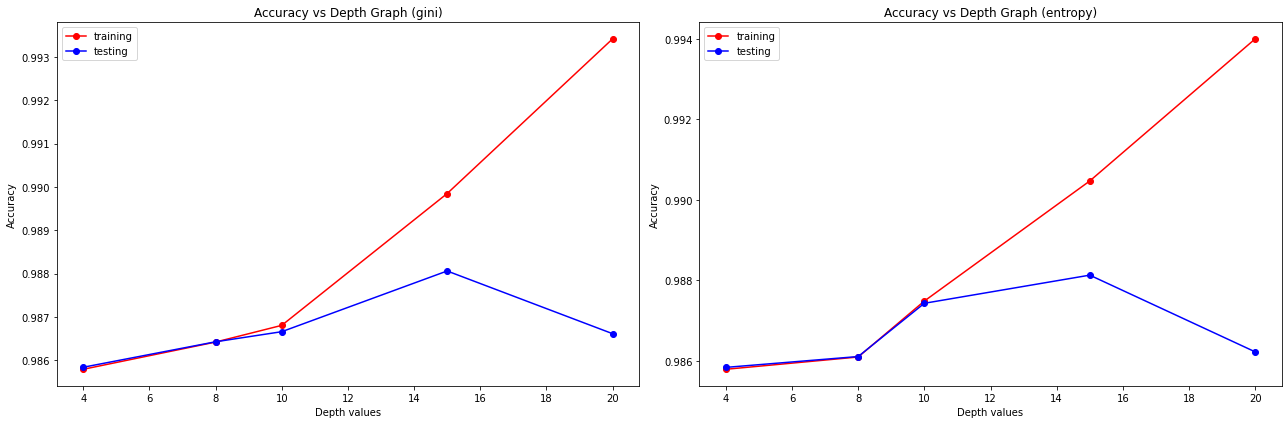

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [18, 6]
plt.rcParams["figure.autolayout"] = True
y1 = gini_accuracies_training
y2 = gini_accuracies_testing
y3 = entropy_accuracies_training
y4 = entropy_accuracies_testing
plt.subplot(121)
plt.xlabel('Depth values')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Depth Graph (gini)")
plt.plot(depths , y1 , marker='o', color='red', label='training')
plt.plot(depths ,y2 , marker='o', color='blue', label='testing')
plt.legend()
plt.subplot(122)
plt.xlabel('Depth values')
plt.ylabel('Accuracy')
plt.title("Accuracy vs Depth Graph (entropy)")
plt.plot(depths , y3 , marker='o', color='red', label='training')
plt.plot(depths , y4 , marker='o', color='blue', label='testing')
plt.legend()
plt.show()

# **Part b**

In [34]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from scipy import stats
from matplotlib import pyplot as plt

In [35]:
def train_trees(X1, Y1, num_trees):
    indices = [i for i in range(X1.shape[0])]
    trees = [DecisionTreeClassifier(criterion="entropy", max_depth=3) for _ in range(num_trees)]
    for tree in trees:
        random_indices = np.random.choice(indices, X1.shape[0])
        X_bootstrap = X1.iloc[random_indices]
        Y_bootstrap = Y1.iloc[random_indices]
        tree.fit(X_bootstrap, Y_bootstrap)
    return trees


In [36]:
def predict(X, trees):
    predictions = []
    for tree in trees:
        Y_pred = tree.predict(X)
        predictions.append(Y_pred)
    
    predictions = np.array(predictions)
    prediction = np.array(stats.mode(predictions))
    return prediction[0, 0, :]

In [37]:
trees = train_trees(x_train, y_train, 100)
prediction = predict(x_test, trees)
accuracy = (prediction == y_test).sum() / prediction.shape[0]
print("Ensembling Entropy accuracy is : ", accuracy)

Ensembling Entropy accuracy is :  0.9859772710649503


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=3,max_samples=0.5)
rf.fit(x_train,y_train)

print("Ensembling train accuracy  : " , accuracy(rf.predict(x_train),y_train))
print("Ensembling test accuracy   : " , accuracy(rf.predict(x_test),y_test))
print("the accuracy of ensembling with depth 3 with mush faster option then getting better accuracy using a decision tree of depth 15 ")
print("entropy test set accuracy  : " , entropy_accuracies_testing)
print("entropy train set accuracy : " , entropy_accuracies_training)


Ensembling train accuracy  :  0.9857906790851492
Ensembling test accuracy   :  0.9858378437682855
the accuracy of ensembling with depth 3 with mush faster option then getting better accuracy using a decision tree of depth 15 
entropy test set accuracy  :  [0.9858378437682855, 0.9861075555880632, 0.987430972059684, 0.9881303942363956, 0.9862241259508484]
entropy train set accuracy :  [0.9857906790851492, 0.9860963085446944, 0.9874868246274651, 0.9904706301844356, 0.9940015320656241]


# **Part c**

In [ ]:
#Adaboost
estimators = [4,8,10,15,20]
for x in estimators:
  print("for estimator :",x)
  DT= DecisionTreeClassifier(criterion='entropy')
  ada_ensemble = AdaBoostClassifier(base_estimator = DT, n_estimators= x, random_state=123)
  ada_ensemble.fit(x_train, y_train)
  y_pred = ada_ensemble.predict(x_test)
  print("Accuracy on test set : ",accuracy(y_test,y_pred))

for estimator : 4
Accuracy on test set :  0.9835887214745466
for estimator : 8
Accuracy on test set :  0.9855521320947923
for estimator : 10
Accuracy on test set :  0.9845715696313634
for estimator : 15
Accuracy on test set :  0.984500713136337
for estimator : 20
Accuracy on test set :  0.9855109896138092
